# Text Classification

## Library Imports

In [17]:
# Import Os to get to the root directory
import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

# Import own functions
from libraries import corpus
from libraries import pdf2text

# Import other libraries
import nltk 
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [26]:
from importlib import reload
reload(corpus)

<module 'libraries.corpus' from 'C:\\Users\\luisd\\Dropbox\\Masters\\BIPM\\2 Semester\\Text, Web and Social Media Analytics\\Project\\datascience_project\\libraries\\corpus.py'>

## Data Preprocessing

In [2]:
dataset = pdf2text.get_dataset()

In [3]:
dataset.keys()

dict_keys(['0chain', '1World', '1x2Coin', 'AB-CHAIN', 'ABCC', 'ABLE', 'Absolute', 'ACE', 'Achain', 'AcreCoin', 'Actinium', 'AcuteAngle', 'Adamant', 'AdBank', 'AdChainRegistry', 'AdCoin', 'Adhive', 'Aditus', 'Adshares', 'Ample!', 'BasicAttentionToken', 'Binance', 'Bitcoin', 'BitcoinGold', 'Cosmos', 'CryptoNote', 'DaiStableCoinSystem', 'Dash', 'EtherAce', 'Ethereum', 'EthereumClassic', 'Giant', 'GiveCoin', 'GuaranteedEntranceToken', 'IOTA', 'KwattCoin', 'Oxcert', 'RippleProtocol', 'StellarConcensusProtocol', 'Tether', 'Tezos', 'Tron', 'Vechain', 'Zerocash'])

In [4]:
len(dataset.keys())

44

In [53]:
dataset['Bitcoin']

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nBitcoin: A Peer-to-Peer Electronic Cash System\n\nSatoshi Nakamoto\nsatoshin@gmx.com\n\nwww.bitcoin.org\n\nAbstract.  A purely  peer-to-peer  version  of  electronic  cash  would  allow online \npayments to be sent directly from one party to another without going through a \nfinancial institution.  Digital signatures provide part of the solution, but the main \nbenefits are lost if a trusted third party is still required to prevent double-spending. \nWe propose a solution to the double-spending problem using a peer-to-peer network. \nThe network timestamps transactions by hashing them into an ongoing chain of \nhash-based proof-of-work, forming a record that cannot be changed without redoing \nthe proof-of-work.  The longest chain not only serves as proof of the sequence of \nevents witnessed, but proof that it came from the largest pool of CPU power.  As \nlong as a majority of CPU power is controlled by nodes that are n

In [27]:
corpus = corpus.makeCleanCorpus(dataset, lemmatize=False, removePunct=False, removeNums=False,removePunctExcept=True)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Cleaning: 0chain
Cleaning: 1World
Cleaning: 1x2Coin
Cleaning: AB-CHAIN
Cleaning: ABCC
Cleaning: ABLE
Cleaning: Absolute
Cleaning: ACE
Cleaning: Achain
Cleaning: AcreCoin
Cleaning: Actinium
Cleaning: AcuteAngle
Cleaning: Adamant
Cleaning: AdBank
Cleaning: AdChainRegistry
Cleaning: AdCoin
Cleaning: Adhive
Cleaning: Aditus
Cleaning: Adshares
Cleaning: Ample!
Cleaning: BasicAttentionToken
Cleaning: Binance
Cleaning: Bitcoin
Cleaning: BitcoinGold
Cleaning: Cosmos
Cleaning: CryptoNote
Cleaning: DaiStableCoinSystem
Cleaning: Dash
Cleaning: EtherAce
Cleaning: Ethereum
Cleaning: EthereumClassic
Cleaning: Giant
Cleaning: GiveCoin
Cleaning: GuaranteedEntranceToken
Cleaning: IOTA
Cleaning: KwattCoin
Cleaning: Oxcert
Cleaning: RippleProtocol
Cleaning: StellarConcensusProtocol
Cleaning: Tether
Cleaning: Tezos
Cleaning: Tron
Cleaning: Vechain
Cleaning: Zerocash
Done!


In [28]:
corpus.keys()

dict_keys(['0chain', '1World', '1x2Coin', 'AB-CHAIN', 'ABCC', 'ABLE', 'Absolute', 'ACE', 'Achain', 'AcreCoin', 'Actinium', 'AcuteAngle', 'Adamant', 'AdBank', 'AdChainRegistry', 'AdCoin', 'Adhive', 'Aditus', 'Adshares', 'Ample!', 'BasicAttentionToken', 'Binance', 'Bitcoin', 'BitcoinGold', 'Cosmos', 'CryptoNote', 'DaiStableCoinSystem', 'Dash', 'EtherAce', 'Ethereum', 'EthereumClassic', 'Giant', 'GiveCoin', 'GuaranteedEntranceToken', 'IOTA', 'KwattCoin', 'Oxcert', 'RippleProtocol', 'StellarConcensusProtocol', 'Tether', 'Tezos', 'Tron', 'Vechain', 'Zerocash'])

In [51]:
corpus['Bitcoin']

'bitcoin peertopeer electronic cash system satoshi nakamoto satoshingmx.com www.bitcoin.org abstract. purely peertopeer version electronic cash allow online payments sent directly party going financial institution. digital signatures provide part solution main benefits lost trusted third party still required prevent doublespending. propose solution doublespending problem using peertopeer network. network timestamps transactions hashing ongoing chain hashbased proofofwork forming record cannot changed redoing proofofwork. longest chain serves proof sequence events witnessed proof came largest pool cpu power. majority cpu power controlled nodes cooperating attack network theyll generate longest chain outpace attackers. network requires minimal structure. messages broadcast best effort basis nodes leave rejoin network accepting longest proofofwork chain proof happened gone. 1. introduction commerce internet rely almost exclusively financial institutions serving trusted third parties proce

In [47]:
sentences = nltk.tokenize.sent_tokenize(corpus['Bitcoin'])
print('We have',len(sentences), 'sentences in total.\n')
print(sentences[5].replace("\n",""))

We have 142 sentences in total.

longest chain serves proof sequence events witnessed proof came largest pool cpu power.


In [52]:
tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)
tokens = [tokenizer.tokenize(s) for s in sentences] # It takes some time; inbuilt tokenizer cannot detect shortform like don't, I've etc
print('We have', np.reshape(np.concatenate(tokens), -1).shape[0], 'words in total. \n') # DON'T do len(sum(tokens,[])) because of speed

# Lower 
tokens = [[t.lower().replace('.','') for t in s] for s in tokens]

print(tokens[5])


We have 1964 words in total. 

[['bitcoin', 'peertopeer', 'electronic', 'cash', 'system', 'satoshi', 'nakamoto', 'satoshingmxcom', 'wwwbitcoinorg', 'abstract'], ['purely', 'peertopeer', 'version', 'electronic', 'cash', 'allow', 'online', 'payments', 'sent', 'directly', 'party', 'going', 'financial', 'institution'], ['digital', 'signatures', 'provide', 'part', 'solution', 'main', 'benefits', 'lost', 'trusted', 'third', 'party', 'still', 'required', 'prevent', 'doublespending'], ['propose', 'solution', 'doublespending', 'problem', 'using', 'peertopeer', 'network'], ['network', 'timestamps', 'transactions', 'hashing', 'ongoing', 'chain', 'hashbased', 'proofofwork', 'forming', 'record', 'cannot', 'changed', 'redoing', 'proofofwork'], ['longest', 'chain', 'serves', 'proof', 'sequence', 'events', 'witnessed', 'proof', 'came', 'largest', 'pool', 'cpu', 'power'], ['majority', 'cpu', 'power', 'controlled', 'nodes', 'cooperating', 'attack', 'network', 'theyll', 'generate', 'longest', 'chain', 'o

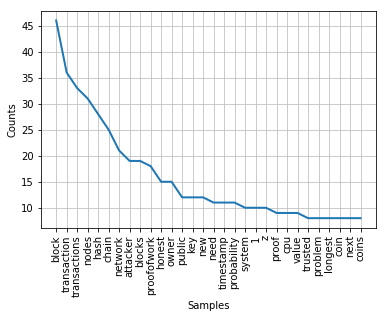

In [49]:
from nltk.probability import FreqDist

# Turn corpus into np before unnest the list
tokens = np.array([np.array(s) for s in tokens]) # numpy can handle text as well

fdist = FreqDist(np.concatenate(tokens))

fdist.most_common(5)

import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

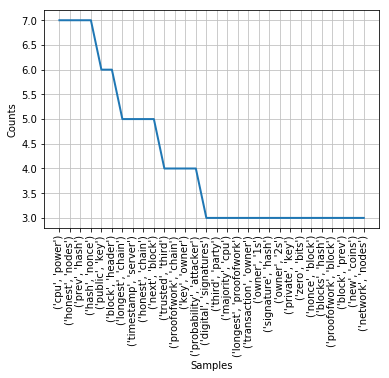

In [50]:
from nltk import bigrams, ngrams
bigrams_tokens = bigrams(np.concatenate(tokens))
fdist_bigrams = FreqDist(list(bigrams_tokens))
fdist_bigrams.plot(30,cumulative=False)
plt.show()